#### Kontrol Automatikoa. IAzterketa praktikoa
2024ko apirilaren 17a

Kontrol diseinu bat egiten, diseinu espezifikazio nagusia da maila sarreraren aurreko erantzunean gaindiketa izatea \simeq\%10, plantaren transferentzia funtzioa hau izanik: 

$G_{p}(s)={\displaystyle \frac{10(s+7)}{s(s+1)(s+6)}}\quad(H(s)=1)$

Erroen kokaeraren teknika erabiliz, PD kontrolagailu kausal hauKasu honetan polo urruna -50 puntuan kokatu da. diseinatu da:

$PD(s)={\displaystyle \frac{K(1+0.2s)}{(1+s/50)}}$

Halere, irabazi proportzionala zehaztean K-ren balio batek baino gehiagok betetzen du eskatutako espezifikazioa bere polo nagusietan. Dauden aukera posibleak aztertzea eskatzen da, baloratuz hoberena, azalduz zergatik eta hurrengoa kontutan hartuz:

(a) Egonkorreko errorea.

(b) Gaindiketaren balioa. Ez bada betetzen espezifikazioa, azaldu arrazoia.

(c) Beste espezifikazioak (puntako denbora eta egonkorreko denbora).

(d) Kontrol seinalearen balioa.

#### Ebazpena

Lehengo sartu datuak

In [12]:
s=%s;
g=10*(s+7)/s/(s+1)/(s+6);g.dt='c'

pd=(1+0.2*s)/(1+0.02*s);

// delta kalkutatu
R=10/100;
d=1/sqrt((%pi/log(R))^2+1)

 g  = 
      70 +10s     
   -------------  
   6s +7s^2 +s^3  
 d  = 
   0.5911550


Marrazten da EK eta $delta$ konstanteko zuzena

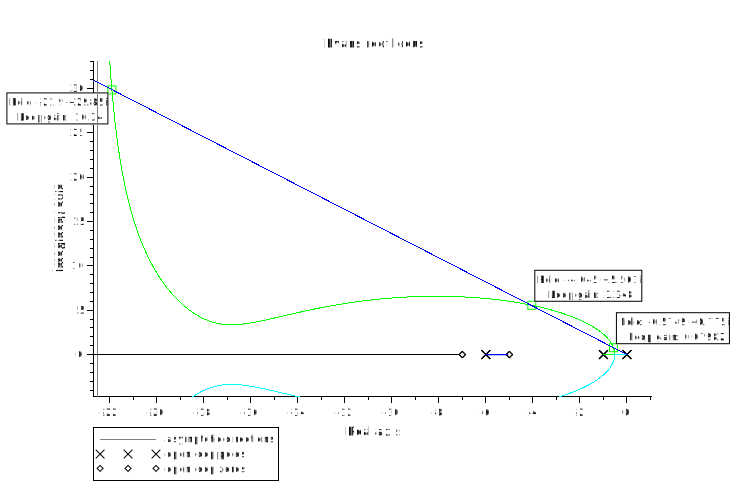

In [9]:
%plot inline //native
wn=[0,40];
s1=(-d+sqrt(d^2-1))*wn;
evans(pd*g)
plot(real(s1),imag(s1))

Hiru soluzio daude

$K_1\simeq 0.08$

$K_2\simeq 3.4$

$K_3\simeq 16$

Aztertu dezakegu denbora eremuan

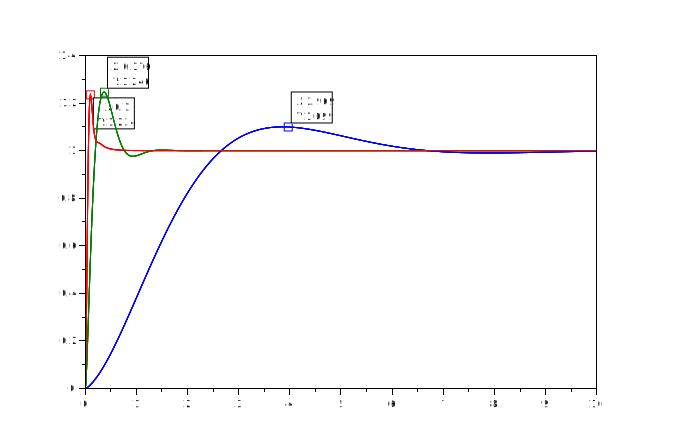

In [18]:
%plot inline //native
t=0:0.01:10;
K1=0.08;
gitxia1=(K1*pd*g)/.(1);
K2=3.4;
gitxia2=(K2*pd*g)/.(1);
K3=16;
gitxia3=(K3*pd*g)/.(1);
y1=csim('step',t,gitxia1);
y2=csim('step',t,gitxia2);
y3=csim('step',t,gitxia3);

plot(t,y1,t,y2,t,y3)


Ikusten da $K_1$-rekin espezifikazioa betetzen delaa, eta besteekin ez. Azalpena EKn dago: beste bi irabaziekin polo nagusietaz gain beste elementuek (batez ere hurbilen dagoen zeroak) eragina dute, sistema azkartuz eta oszilakorragoa bihurtuz, kaltetzen gaindiketa.

Orain abidatura (puntako denbora eta egonkortze denbora) txikiagoak dira K altuagoa izanik.

Bestalde, sistema 1 motakoa da. Prezisioa berdina da maila sarreraren aurrean $e_{ss}=0$. Arrapala sarreraren aurrean, hori bai, K-ren menpekoa izan da gero eta hobea K altuagoa izanik.

Amaitzeko, aztertuko da Kontrol seinalea (PD kausalak dira eta ez dago arazorik TFarekin)

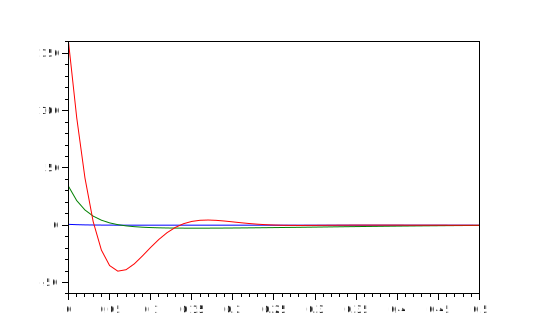

In [21]:
t=0:0.01:0.5;
uitxia1=(K1*pd)/.(g);
uitxia2=(K2*pd)/.(g);
uitxia3=(K3*pd)/.(g);
u1=csim('step',t,uitxia1);
u2=csim('step',t,uitxia2);
u3=csim('step',t,uitxia3);
plot(t,u1,t,u2,t,u3)


Ikusten da kontrol seinalea K-ren menpekoa dela, gero eta handiagoa  K altuagoa izanik.

Ez dago sistemaren fisika zehaztuta eta ezin da ziurtatu kontrol seialeak egokiak diren. Baina $K_3$-ren kasuan arazoak egon daitezke saturazioarekin, balio altuenak direlako eta $K_1$-ren kasuan arazoa zona hila izan daiteke, balio txikiegiak badira.